In [1]:
from utils.preprocessing import Preprocessor
from utils.utils import create_split
import xgboost as xgb
import pandas as pd
from Validation.Validation import doFullValidation
import os

In [2]:
# Load and split data

# TODO: automatically create or load depending if pkl format exists
# Add output pickle file to data folder

def getPickleFile(directory_path):
    files = os.listdir(directory_path)
    for file in files:
        if file.endswith(".pkl"):
            return file
    return False


path = "data/SamplesV2/CloseByPion/histo"
file = getPickleFile(path)
file = "NtupleMaxTrackster.pkl"
if os.path.isfile(os.path.join(path,file)):
    print("%s exists. Load File"%file)
    d = Preprocessor.loadNtuple(os.path.join(path,file))
else:
    print("%s doesn't exist. Create File"%file)
    preprocessor = Preprocessor(path)
    preprocessor.saveToPickle(os.path.join(path,file))
    d = Preprocessor.loadNtuple(os.path.join(path,file))
X_train, y_train, X_test, y_test = create_split(d)


NtupleMaxTrackster.pkl doesn't exist. Create File


In [3]:
X_train

,tkx_energy,tkx_numtkx,cee_120,cee_200,cee_300,ceh_120,ceh_200,ceh_300,ceh_scint,EV1,...,EV3,eVector0_x,eVector0_y,eVector0_z,sigmaPCA1,sigmaPCA2,sigmaPCA3,barycenter_x,barycenter_y,barycenter_z
66879,126.026604,5,0.003512,0.0,0.0,0.974642,0.021846,0.000000,0.0,123.714622,...,0.162067,0.013901,0.119838,0.992696,11.120214,0.928897,0.466370,10.400167,37.578960,386.160187
15394,30.796652,6,0.015333,0.0,0.0,0.914142,0.070525,0.000000,0.0,252.652084,...,0.252671,-0.127133,0.081126,0.988563,15.265686,1.036580,4.500870,-50.731846,32.263557,380.184906
32625,276.968018,4,0.000000,0.0,0.0,0.550787,0.448275,0.000938,0.0,253.576431,...,0.033244,-0.101571,0.054327,0.993344,15.915771,0.496786,0.376235,-36.690189,29.886538,409.263153
83729,8.630543,2,0.000000,0.0,0.0,0.000000,0.522015,0.477985,0.0,44.679012,...,0.709118,-0.114228,0.191220,0.974878,6.554595,2.268314,1.109935,-71.302490,65.401543,375.855072
71962,247.793564,4,0.000000,0.0,0.0,0.000000,0.971817,0.028183,0.0,119.039894,...,0.047118,-0.011146,0.060295,0.998118,10.900483,1.178143,0.457013,-28.825792,44.100571,446.705170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67828,181.160919,4,0.086955,0.0,0.0,0.873125,0.039920,0.000000,0.0,260.562164,...,0.383434,-0.018687,0.136463,0.990469,15.800193,2.882061,1.952281,-10.972183,53.133621,387.324310
49109,185.338348,6,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,40.121727,...,0.020540,-0.034649,-0.138420,0.989767,6.085882,1.599489,0.761377,-10.587781,-42.906002,342.603149
13485,79.419647,5,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,65.558266,...,0.010236,-0.178778,0.008078,0.983856,7.952287,1.286039,0.858836,-55.858723,5.878993,347.903351
30894,146.018524,3,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,59.486477,...,0.012330,-0.201265,0.246912,0.947906,7.676991,0.403175,0.645900,-69.301964,86.272079,342.217163


In [4]:
# Hyperparameter Search

# TODO: optional
regressor=xgb.XGBRegressor(eval_metric='rmsle')
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
#search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

#print("The best hyperparameters are ",search.best_params_)

In [5]:
# Create Model

#  TODO: store externally
settings = {"learning_rate":0.005,
           "n_estimators":1700,
           "max_depth":3,
           "eval_metric":'rmse'}

regressor=xgb.XGBRegressor(learning_rate = settings["learning_rate"],
                           n_estimators  = settings["n_estimators"],
                           max_depth     = settings["max_depth"],
                           eval_metric = settings["eval_metric"])

In [6]:
# Train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# Predict
predictions = regressor.predict(X_test)

In [8]:
y_test

54240    144.548218
36007    405.470459
59958    107.050041
47084    397.654816
66540    416.221466
            ...    
30190    253.836670
43421    106.704468
41837    275.694153
55100    574.115540
43946    462.581177
Name: cp_energy, Length: 18756, dtype: float64

Directory 'plots/XGBoost/v2/MaxTrackster' already exists.


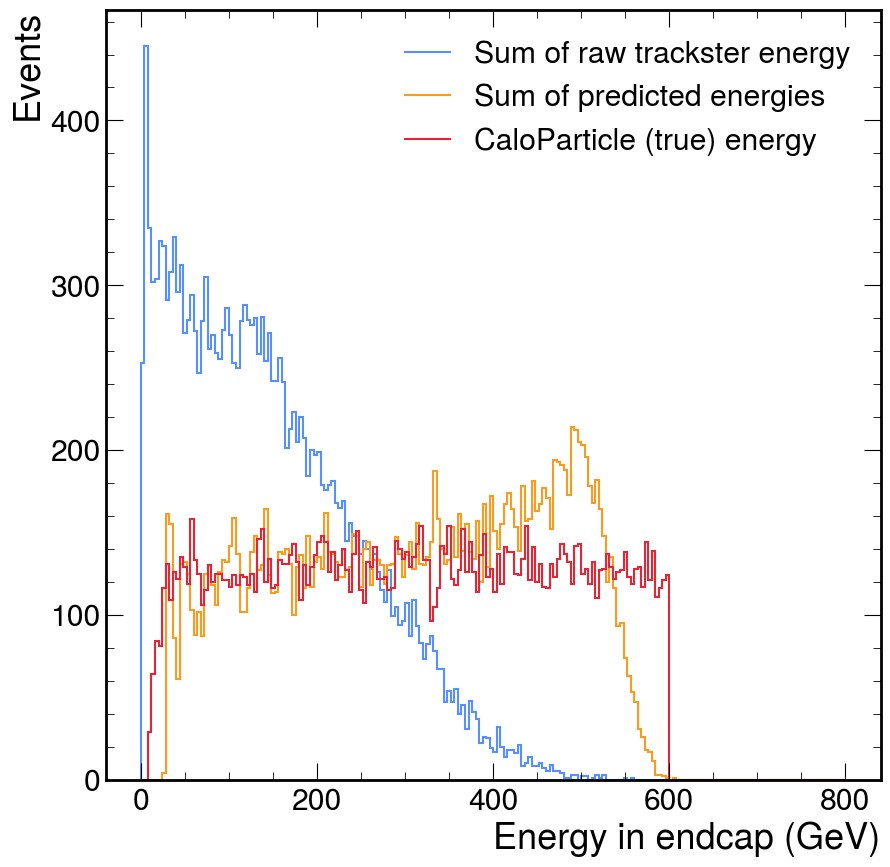

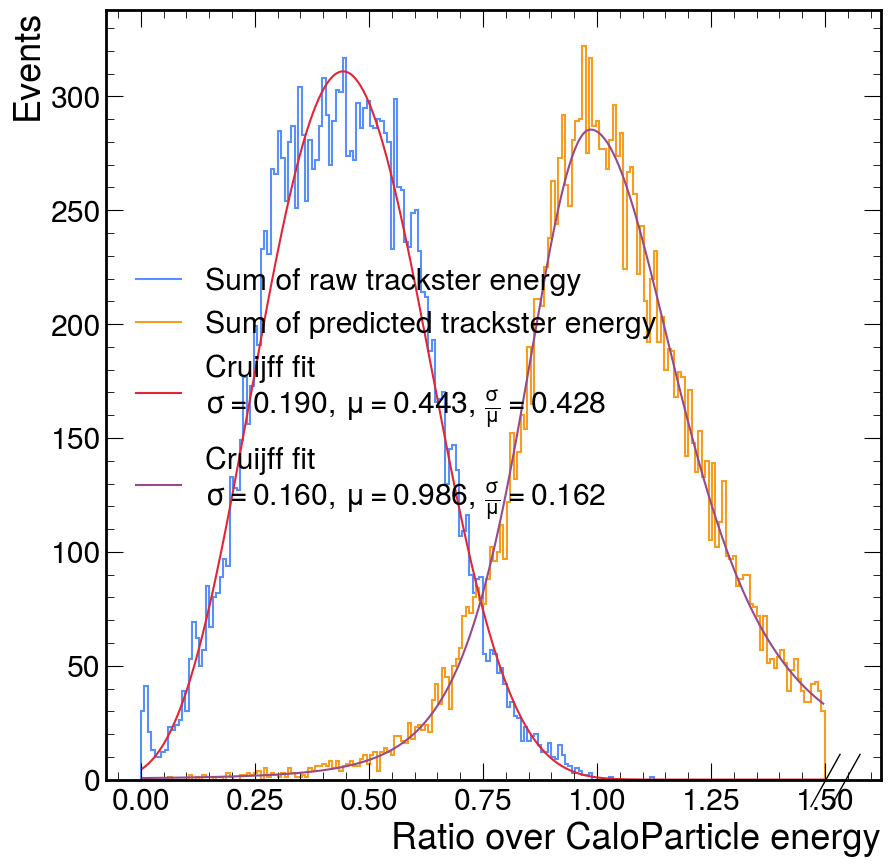

In [9]:
# Validation

#TODO: sensible output

def create_directory_if_not_exists(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # Create the directory if it doesn't exist
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

path="plots/XGBoost/v2/MaxTrackster"
create_directory_if_not_exists(path)
doFullValidation(X_test, y_test, predictions,path)